### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [72]:
data = pd.read_csv('data/coupons.csv')

**Let's fix the incorrect spelling in the column name 'passanger'**

In [73]:
data.rename(columns={'passanger':'passenger'}, inplace=True)

In [74]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [75]:
data.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

There are 6 columns with missing data
- car
- Bar
- CoffeeHouse
- CarryAway
- RestaurantLessThan20
- Restaurant20To50

Here, I would consider the following methods for treating the missing data:

1. **Dropping rows with missing data**: Dropping rows is less than ideal given the data set isn't big, and this can create a bias in analytic results.  Also, 'car' column is missing values for most rows

2. **Replacing them with zeros**: Replacing them with zeros isn't ideal either, given zero could actually represent a meaningful data point for some columns.  Also, these columns are non-numeric, which rules this out this method

3. **Replacing them with a strong value 'missing'**: Simply replacing them with string values 'missing' is our preferred approach here, since all columns are non-numeric

4. **Replacing them with mean/median values**: Replacing them with mean/median values is also a reasonable approach, though whether assuming expected values for the missing values is reasonable remains questionable.  When we convert non-numeric, ordinal column values into integers, we will apply the mean value for the 'missing' values to avoid these 'missing' values biasing the analysis results in any way.  Given there are only a small percentage of 'missing' values, this approach seems reasonable

##### What to do with Car column

In [76]:
print(data.car.isnull().sum())
print(data.shape[0])

12576
12684


* 12,576 out of 12,684 rows are NaN.  Given the sparcity of data population, it is unlikely this column will be a useful indicator of whether a driver accepts coupons
* Therefore, we will drop this column

In [77]:
data = data.iloc[:,data.columns != 'car']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

##### What to do with Bar column

In [78]:
data[data['Bar'].isnull()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,1,1,0,1,0


* Looks like the rows missing values in the Bar column contain valid information

In [79]:
data['Bar'].value_counts(dropna=False)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

* Given Bar is a non-numeric column, we will replace the NaN values with a new non-numeric value called "missing"
* Also, there is only a small percentage of NaN values for this column

In [80]:
data['Bar'].fillna('missing', inplace=True)

##### What to do with CoffeeHouse column

In [81]:
data[data['CoffeeHouse'].isnull()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


* Looks like the rows missing values in the CoffeeHouse column contain valid information

In [82]:
data['CoffeeHouse'].value_counts(dropna=False)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

* Given CoffeeHouse is a non-numeric column, we will replace the NaN values with a new non-numeric value called "missing"
* Also, there is only a small percentage of NaN values for this column

In [83]:
data['CoffeeHouse'].fillna('missing', inplace=True)

##### What to do with CarryAway column

In [84]:
data[data['CarryAway'].isnull()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,0,0,1,0,1
8645,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8646,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8647,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0


* Looks like the rows missing values in the CarryAway column contain valid information

In [85]:
data['CarryAway'].value_counts(dropna=False)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

* Given CarryAway is a non-numeric column, we will replace the NaN values with a new non-numeric value called "missing"
* Also, there is only a small percentage of NaN values for this column

In [86]:
data['CarryAway'].fillna('missing', inplace=True)

##### What to do with RestaurantLessThan20 column

In [87]:
data[data['RestaurantLessThan20'].isnull()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,missing,missing,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,missing,missing,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,missing,missing,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,missing,missing,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,missing,missing,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,Work,Alone,Sunny,30,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,0
8974,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,1
8975,Work,Alone,Sunny,80,7AM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,0,0,1,0,1
8976,Work,Alone,Rainy,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,1,0,1,1


* Looks like the rows missing values in the RestaurantLessThan20 column contain valid information

In [88]:
data['RestaurantLessThan20'].value_counts(dropna=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

* Given RestaurantLessThan20 is a non-numeric column, we will replace the NaN values with a new non-numeric value called "missing"
* Also, there is only a small percentage of NaN values for this column

In [89]:
data['RestaurantLessThan20'].fillna('missing', inplace=True)

##### What to do with Restaurant20To50 column

In [90]:
data[data['Restaurant20To50'].isnull()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,missing,missing,missing,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,missing,missing,missing,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,missing,missing,missing,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,missing,missing,missing,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,missing,missing,missing,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,0,1,1
12301,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,1,0,1
12302,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,0,0,1,0
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,1,0,1,0


* Looks like the rows missing values in the Restaurant20To50 column contain valid information

In [91]:
data['Restaurant20To50'].value_counts(dropna=False)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

* Given Restaurant20To50 is a non-numeric column, we will replace the NaN values with a new non-numeric value called "missing"
* Also, there is only a small percentage of NaN values for this column

In [92]:
data['Restaurant20To50'].fillna('missing', inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [93]:
data.query('Y == 1').shape[0] / data.shape[0]

0.5684326710816777

* 56.84% of overall drivers chose to accept coupons.  This statistic will be useful in gaugingg when, where, and to whom coupons were more effective

5. Use a bar plot to visualize the `coupon` column.

In [94]:
px.bar(data, x='coupon', title='Number of Targeted Drivers by Coupon Type', labels={'coupon':'Coupon Type'})

In [95]:
px.bar(data.groupby('coupon')[['Y']].mean(), title='Coupon Acceptance Rate by Coupon Type', labels={'coupon':'Coupon Type'})

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Number of Targeted Drivers by Outdoor Temperature')

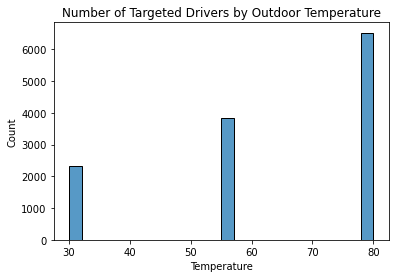

In [96]:
sns.histplot(data=data, x='temperature')
plt.xlabel('Temperature')
plt.title('Number of Targeted Drivers by Outdoor Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [97]:
bar_data = data.query('coupon == "Bar"')
bar_data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,missing,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,missing,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,missing,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [98]:
bar_data.Y.value_counts()[1]/bar_data.Y.value_counts().sum()

0.41001487357461575

* 41.00% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


0.37061769616026713
0.7688442211055276


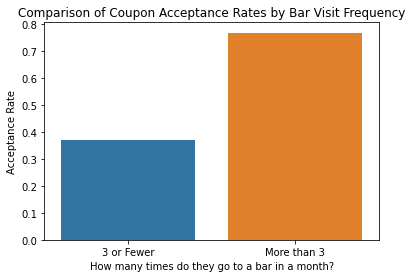

In [99]:
bar_3fewer_list = ['1~3','less1','never']
bar_more3_list = ['4~8','gt8']

acceptance_rate_a = bar_data.query('Bar in @bar_3fewer_list')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar in @bar_more3_list')['Y'].mean()

labels = ['3 or Fewer','More than 3']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('How many times do they go to a bar in a month?')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Bar Visit Frequency')

print(acceptance_rate_a)
print(acceptance_rate_b)

* Bar coupons are much more likely to get accepted by those who visit bars more than 3 times a month than those who visit less frequently

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


0.6952380952380952
0.33500313087038197


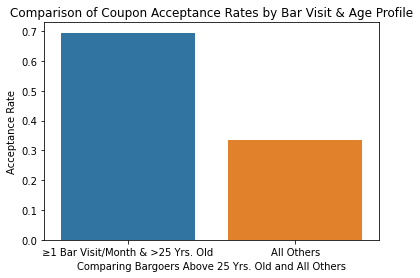

In [100]:
bar_more1_list = ['1~3','4~8','gt8']
age_over25_list = ['26','31','50plus','36','41','46']

acceptance_rate_a = bar_data.query('Bar in @bar_more1_list & age in @age_over25_list')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar not in @bar_more1_list | age not in @age_over25_list')['Y'].mean()

labels = ['≥1 Bar Visit/Month & >25 Yrs. Old','All Others']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('Comparing Bargoers Above 25 Yrs. Old and All Others')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Bar Visit & Age Profile')

print(acceptance_rate_a)
print(acceptance_rate_b)

* Drivers who visit a bar at least once a month and are 25 years of age or older are more than twice more likely to accept a bar coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


##### Comparing those who go to bars more than once a month versus all others

0.6879194630872483
0.29345531315974666


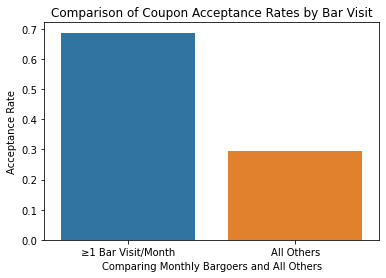

In [101]:
bar_more1_list = ['1~3','4~8','gt8']

acceptance_rate_a = bar_data.query('Bar in @bar_more1_list')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar not in @bar_more1_list')['Y'].mean()

labels = ['≥1 Bar Visit/Month','All Others']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('Comparing Monthly Bargoers and All Others')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Bar Visit')

print(acceptance_rate_a)
print(acceptance_rate_b)

* Bargoers who visit a bar at least once a month are more likely to accept bar coupons.  A subset of these bargoers who are above 25 years old are slightly more likely to accept bar coupons (69.52% v. 68.79%), but this could be due to noise in the data

##### Comparing those who go to bars more than once a month and have non-child passengers versus all others

0.717948717948718
0.3770581778265642


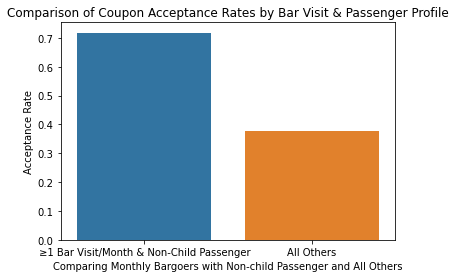

In [102]:
bar_more1_list = ['1~3','4~8','gt8']
passenger_adult_list = ['Partner','Friend(s)']

acceptance_rate_a = bar_data.query('Bar in @bar_more1_list & passenger in @passenger_adult_list')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar not in @bar_more1_list | passenger not in @passenger_adult_list')['Y'].mean()

labels = ['≥1 Bar Visit/Month & Non-Child Passenger','All Others']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('Comparing Monthly Bargoers with Non-child Passenger and All Others')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Bar Visit & Passenger Profile')

print(acceptance_rate_a)
print(acceptance_rate_b)

* Bargoers who visit a bar at least once a month with non-child passengers are more likely to accept bar coupons. Having a non-child passenger increases their likelihood from 68.79% to 71.79%

##### Comparing those who go to bars more than once a month and have non-child passengers versus all others and do not have occupations in farming, fishing, or forestry versus all others


0.717948717948718
0.3770581778265642


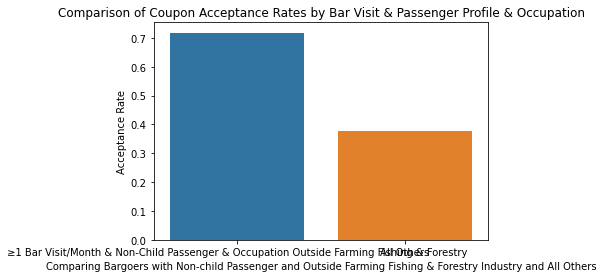

In [103]:
bar_more1_list = ['1~3','4~8','gt8']
passenger_adult_list = ['Partner','Friend(s)']

acceptance_rate_a = bar_data.query('Bar in @bar_more1_list & passenger in @passenger_adult_list & occupation != "Farming Fishing & Forestry"')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar not in @bar_more1_list | passenger not in @passenger_adult_list | occupation == "Farming Fishing & Forestry"')['Y'].mean()

labels = ['≥1 Bar Visit/Month & Non-Child Passenger & Occupation Outside Farming Fishing & Forestry','All Others']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('Comparing Bargoers with Non-child Passenger and Outside Farming Fishing & Forestry Industry and All Others')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Bar Visit & Passenger Profile & Occupation')

print(acceptance_rate_a)
print(acceptance_rate_b)

* Acceptance percentage remains the same as "bargoers who visit a bar at least once a month with non-child passengers," indicating that there are no one who have occupations in Farming Fishing & Forestry among this group

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



0.717948717948718
0.7217391304347827
0.45348837209302323


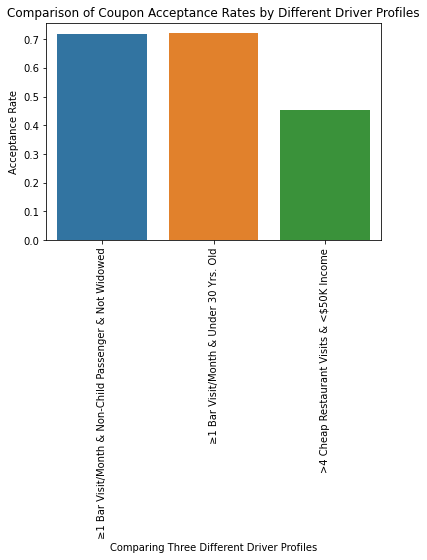

In [104]:
bar_more1_list = ['1~3','4~8','gt8']
passenger_adult_list = ['Partner','Friend(s)']
age_under30_list = ['21','26','below21']
cheap_rest_4more_list = ['4~8','gt8']
income_under50k_list = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']

acceptance_rate_a = bar_data.query('Bar in @bar_more1_list & passenger in @passenger_adult_list & maritalStatus != "Widowed"')['Y'].mean()
acceptance_rate_b = bar_data.query('Bar in @bar_more1_list & age in @age_under30_list')['Y'].mean()
acceptance_rate_c = bar_data.query('RestaurantLessThan20 in @cheap_rest_4more_list & income in @income_under50k_list')['Y'].mean()

labels = ['≥1 Bar Visit/Month & Non-Child Passenger & Not Widowed','≥1 Bar Visit/Month & Under 30 Yrs. Old','>4 Cheap Restaurant Visits & <$50K Income']
acceptance_rate_data = [acceptance_rate_a, acceptance_rate_b, acceptance_rate_c]

sns.barplot(x=labels, y=acceptance_rate_data)
plt.xlabel('Comparing Three Different Driver Profiles')
plt.xticks(rotation=90)
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Coupon Acceptance Rates by Different Driver Profiles')

print(acceptance_rate_a)
print(acceptance_rate_b)
print(acceptance_rate_c)

* The most striking insight here is that low-income drivers who frequent cheap restaurants are much less likely to accept bar coupons

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers who accepted bar coupons show the following characteristics:
- They are more likely to have frequented bars
- They likely have adult passengers
- There isn't a straightforward relationship with age.  It appears that certain age ranges like 25-30 and 45-50 that seem to have higher likelihood to accept bar coupons, but this could be due to noise.
- They likely do not visit cheap restaurants often, and they likely have higher income

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Create a dataframe that contains just the drivers who received a "fine dining" (or restaurants in the range of 20-50 USD) coupon

In [105]:
finedining_data = data.query('coupon == "Restaurant(20-50)"').copy()

In [106]:
finedining_data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,missing,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,missing,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


##### Convert select columnsinto appropriate types (e.g. numeric and binary) for analysis

In [107]:
passenger_mapping = {'Partner':True, 'Alone':False, 'Kid(s)':False, 'Friend(s)':False}
weather_mapping = {'Sunny':True, 'Snowy':False, 'Rainy':False}
expiration_mapping = {'1d':True, '2h':False}
age_mapping = {'below21':1, '21':2, '26':3, '31':4, '36':5, '41':6, '46':7, '50plus':8}
has_children_mapping = {0:False, 1:True}
education_mapping = {'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5, 'Graduate degree (Masters or Doctorate)':6}
income_mapping = {'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}
Bar_mapping = {'never':1, 'less1':2, '1~3':3, 'missing':3, '4~8':4, 'gt8':5}
RestaurantLessThan20_mapping = {'never':1, 'less1':2, '1~3':3, 'missing':3, '4~8':4, 'gt8':5}
Restaurant20To50_mapping = {'never':1, 'less1':2, '1~3':3, 'missing':3, '4~8':4, 'gt8':5}
Y_mapping = {'1':True, '0':False}

finedining_data['updated_passenger'] = finedining_data['passenger'].replace(passenger_mapping)
finedining_data['updated_weather'] = finedining_data['weather'].replace(weather_mapping)
finedining_data['updated_expiration'] = finedining_data['expiration'].replace(expiration_mapping)
finedining_data['updated_age'] = finedining_data['age'].replace(age_mapping)
finedining_data['updated_has_children'] = finedining_data['has_children'].replace(has_children_mapping)
finedining_data['updated_education'] = finedining_data['education'].replace(education_mapping)
finedining_data['updated_income'] = finedining_data['income'].replace(income_mapping)
finedining_data['updated_Bar'] = finedining_data['Bar'].replace(Bar_mapping)
finedining_data['updated_RestaurantLessThan20'] = finedining_data['RestaurantLessThan20'].replace(RestaurantLessThan20_mapping)
finedining_data['updated_Restaurant20To50'] = finedining_data['Restaurant20To50'].replace(Restaurant20To50_mapping)
finedining_data['updated_Y'] = finedining_data['Y'].replace(Y_mapping)

* Note that the last three columns that have 'missing' values are replaced with the mean value of 3 to avoid biasing the results in any meaningful way
* Given there are only a few 'missing' values, it is unlikely that this will distort analytic findings 

##### Create a function to speed up the operations

In [108]:
def percentage_grapher_seg (df, column):
    grouped = df.groupby(column)[['Y']].value_counts(normalize=True).unstack()
    percentage = (grouped[1] * 100).round(2)
    fig = px.bar(grouped, x=grouped.index, y=1, labels={'1': 'Percentage'}, title='Percentage of Coupon Acceptance Segmentation')
    fig.show()

#### Create 1st order segmentations to understand general trends

In [109]:
percentage_grapher_seg(finedining_data, 'destination')

* While no urgent place does show a higher acceptance rate, this is too unspecific to draw meaningful business conclusion

In [110]:
percentage_grapher_seg(finedining_data, 'passenger')

* It is clear that those driving with a partner is much more likely to accept a coupon for fine dining

In [111]:
percentage_grapher_seg(finedining_data, 'weather')

* It is clear that nicer weather encourages drivers to accept coupon to fine dining

In [112]:
percentage_grapher_seg(finedining_data, 'temperature')

* Similarly, warmer temperatures encourage drivers to accept coupon to fine dining

In [113]:
percentage_grapher_seg(finedining_data, 'time')

* Time shows mixed patterns, and it's hard to draw concrete conclusions.  

In [114]:
percentage_grapher_seg(finedining_data, 'expiration')

* Coupons with longer expiration time are more likely to drive higher acceptance rates

In [115]:
percentage_grapher_seg(finedining_data, 'gender')

* Male drivers are slightly more likely to accept coupons to fine dining, but it is difficult to tell more confidently

In [116]:
percentage_grapher_seg(finedining_data, 'age')

* Age shows mixed patterns, and it's hard to draw concrete conclusions.  

In [117]:
percentage_grapher_seg(finedining_data, 'maritalStatus')

* Those who have unmarried/married partners or are single show higher acceptance rates than those who are either divorced or widowed

In [118]:
percentage_grapher_seg(finedining_data, 'updated_has_children')

* Those who don't have children show higher acceptance rates than those who do

In [119]:
percentage_grapher_seg(finedining_data, 'education')

* Interestingly, drivers with higher educational attainment are less likely to accept coupons to fine dining

In [120]:
percentage_grapher_seg(finedining_data, 'occupation')

* Occupation shows mixed patterns, and it's hard to draw concrete conclusions.  This could be highly correlated with income

In [121]:
percentage_grapher_seg(finedining_data, 'income')

* Income shows mixed patterns, and it's hard to draw concrete conclusions.  

In [122]:
percentage_grapher_seg(finedining_data, 'Bar')

* Those who go to a bar more than 8 times a month are much more likely to accept coupons to fine dining

In [123]:
percentage_grapher_seg(finedining_data, 'CoffeeHouse')

* Coffee house visit history shows mixed patterns, and it's hard to draw concrete conclusions.  

In [124]:
percentage_grapher_seg(finedining_data, 'CarryAway')

* Carry away history shows mixed patterns, and it's hard to draw concrete conclusions.  

In [125]:
percentage_grapher_seg(finedining_data, 'Restaurant20To50')

* Not surprisingly, those who frequent fine dining restaurants are more likely to accept coupons to fine dining

In [126]:
percentage_grapher_seg(finedining_data, 'RestaurantLessThan20')

* In fact, those who frequent cheaper restaurants are also more likely to accept coupons to fine dining

#### Identify cross correlations in a heatmap

##### Create a correlation heatmap

<AxesSubplot:>

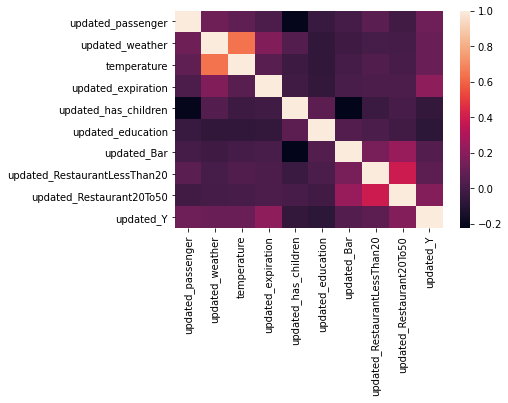

In [127]:
finedining_data_filtered = finedining_data[['updated_passenger','updated_weather','temperature','updated_expiration','updated_has_children','updated_education','updated_Bar','updated_RestaurantLessThan20','updated_Restaurant20To50', 'updated_Y']]
sns.heatmap(finedining_data_filtered.corr())

* Weather and temperature are highly correlated
* People who dine at fine dining restaurants are also dining at cheap restaurants
* People who dine at fine dining restaurants are also visiting bars frequently
* Having longer expiration time and prior visit history to fine dining are most correlated with coupon acceptance
* Among the filtered set of columns that showed interesting 1st order patterns, having children and education are least correlated with coupon acceptance

#### Further Deep Dive Analysis

##### What % of drivers received 2h coupons more than 2 hours before typical dinner or lunch time (12pm, 6pm) or afterwards?  Did this impact their acceptance rates?

In [128]:
finedining_data['expiration'].value_counts()

expiration
1d    956
2h    536
Name: count, dtype: int64

* 536 out of 1,492 drivers received 2h coupons.  As we saw above, these are less effective in driving acceptance than 1d coupons

In [129]:
percentage_grapher_seg(finedining_data[finedining_data['expiration']=='2h'], 'time')

* Unsurprisingly, if they received 2h coupons early morning (7am) or late night (10pm), they are unlikely to accept these coupons given the 2-hour window does not overlap with either lunch or dinner time
* It is also worth noting that coupons that arrived slightly BEFORE meal times (e.g. 10am, 2pm) yielded higher acceptance rates than those arrived AT meal times (e.g. 6pm).
* Hence, the business takeaway should be that 2h coupons should target customers before lunch and dinner times

##### Of the drivers who received coupons at 10am and 2pm (the best times for 2h coupons as shown above), did 2h coupons result in higher acceptance rates?

In [130]:
percentage_grapher_seg(finedining_data[finedining_data['time'].isin(['10AM','2PM'])], 'expiration')

* Even for the drivers that received coupons at 10am and 2pm--the prime times for 2h coupons--1d coupons resulted in a higher acceptance rate
* Hence, we can hypothesize that 1d coupons are in almost all cases more effective than 2h coupons

##### Are drivers with their partners in the passenger seats that have no children more likely to accept fine dining coupons than those who do?

In [131]:
percentage_grapher_seg(finedining_data.query('passenger == "Partner"'), 'updated_has_children')

* As expected, those driving with their partners with no children are more likely to accept coupons than those who do, given they likely have mealtime commitments

##### Does this pattern for those driving with their partners that have no children hold true for Carry out & Take away coupons

In [132]:
carryout_takeaway_data = data.query('coupon == "Carry out & Take away"').copy()
carryout_takeaway_data['updated_has_children'] = carryout_takeaway_data['has_children'].replace(has_children_mapping)

In [133]:
percentage_grapher_seg(carryout_takeaway_data.query('passenger == "Partner"'), 'updated_has_children')

* Interestingly, it turns out that there is a more effective coupon for those driving with partners who have children.
* The convenience of carry outs & take aways appeal strongly to these parents, who show a higher acceptance rate than those driving with partners who have no children
* From business perspective, we should weigh the ROI of providing finedining coupons (likely higher margin with lower acceptance rate) against carry out & take away coupons (likely lower margin with higher acceptance rate)